# Exploratory Data Analysis in Python

### Libraries and datasets

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import norm

nsfg = pd.read_hdf('datasets/nsfg.hdf5')
gss = pd.read_hdf('datasets/gss.hdf5')

## 1. Read, clean, and validate

### Exploring the NSFG data
Instructions:
<ul>
<li>Calculate the number of rows and columns in the DataFrame nsfg.</li>
<li>Display the names of the columns in nsfg.</li>
<li>Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.</li>
<li>Display the first 5 elements of ounces.</li>
</ul>

In [2]:
# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


### Clean a variable
Instructions:
<ul>
<li>In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.</li>
<li>Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.</li>
</ul>

In [6]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### Compute a variable
Instructions:
<ul>
<li>Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.</li>
<li>Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.</li>
<li>Use .describe() to compute the mean duration and other summary statistics.</li>
</ul>

In [7]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


### Make a histogram
Instructions:
<ul>
<li>Plot a histogram of agecon with 20 bins.</li>
<li>Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.</li>
</ul>

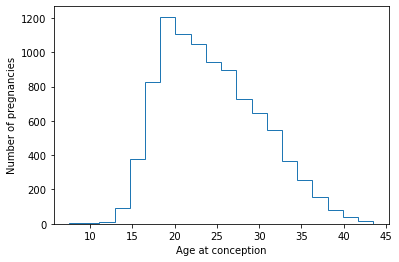

In [10]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

### Compute birth weight
Instructions:
<ul>
<li>Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.</li>
<li>Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.</li>
<li>Compute the mean weight of full-term babies.</li>
</ul>

In [13]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

### Filter
Instructions:
<ul>
<li>Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.</li>
<li>Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.</li>
<li>For comparison, select multiple, full-term babies and compute their mean birth weight.</li>
</ul>

In [ ]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

### Make a PMF
Instructions:
<ul>
<li>Make a PMF for year with normalize=False and display the result.</li>
</ul>

In [6]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: , Length: 62466, dtype: int64


### Plot a PMF
Instructions:
<ul>
<li>Select the 'age' column from the gss DataFrame and store the result in age.</li>
<li>Make a normalized PMF of age. Store the result in pmf_age.</li>
<li>Plot pmf_age as a bar chart.</li>
</ul>

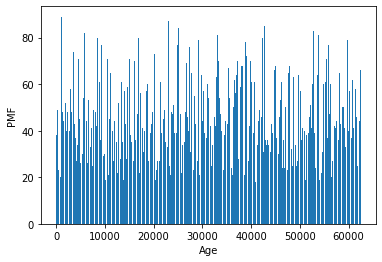

In [7]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

## 2. Distributions

### Make a CDF
Instructions:
<ul>
<li>Select the 'age' column. Store the result in age.</li>
<li>Compute the CDF of age. Store the result in cdf_age.</li>
<li>Calculate the CDF of 30.</li>
</ul>

In [4]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


### Compute IQR
Instructions:
<ul>
<li>Calculate the 75th percentile of income and store it in percentile_75th.</li>
<li>Calculate the 25th percentile of income and store it in percentile_25th.</li>
<li>Calculate the interquartile range of income. Store the result in iqr.</li>
</ul>

In [ ]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

### Plot a CDF
Instructions:
<ul>
<li>Select 'realinc' from the gss dataset.</li>
<li>Make a Cdf object called cdf_income.</li>
<li>Create a plot of cdf_income using .plot().</li>
</ul>

In [ ]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

### Extract education levels
Instructions:
<ul>
<li>Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.</li>
<li>Complete the line that identifies respondents with 12 or fewer years of education.</li>
<li>Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.</li>
</ul>

In [5]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


### Plot income CDFs
Instructions:
<ul>
<li>Fill in the missing lines of code to plot the CDFs.</li>
</ul>

In [ ]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

### Distribution of income
Instructions:
<ul>
<li>Extract 'realinc' from gss and compute its logarithm using np.log10().</li>
<li>Compute the mean and standard deviation of the result.</li>
<li>Make a norm object by passing the computed mean and standard deviation to norm().</li>
</ul>

In [11]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290043733010077


### Comparing CDFs
Instructions:
<ul>
<li>Evaluate the normal cumulative distribution function using dist.cdf.</li>
<li>Use the Cdf() function to compute the CDF of log_income.</li>
<li>Plot the result.</li>
</ul>

In [ ]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

### Comparing PDFs
Instructions:
<ul>
<li>Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.</li>
<li>Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.</li>
</ul>

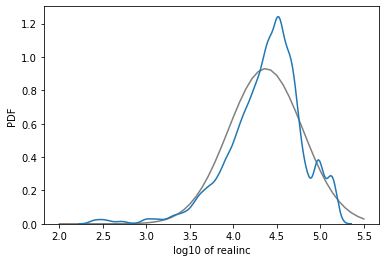

In [14]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

## 3. Structuring written reports

## 4. Multivariate Thinking